##**Introdução e análise exploratória**

Esse dataset contém informações laboratoriais a respeito da composição do sangue de doadores. Nosso objetivo nessa etapa será usar uma rede neural para prever quando um paciente pode doar sangue ou não com base nas features clínicas.

Informações

* Category - Categoria do paciente
Valores:
  0 = Doador
  0s = Doador suspeito
  1 = Hepatite C
  2 = Fibrose
  3 = Cirrose

* Age - Idade

* Sex - Gênero

* ALB - Concentração de albumina no sangue (mg/Hl)
  tipo: float

* ALP - Fosfatase alcalina no sangue (mg/Hl)
  tipo: float

* ALT - Concentração da enzima ALT no sangue (mg/Hl)
  tipo: float

* AST - Concentração da enzima AST no sangue (mg/Hl)
  tipo: float

* BIL - Concentração de Bilirrubina no sangue (mg/Hl)
  tipo: float

* CHE - Exame de colinesterase (mg/Hl)
  tipo: float

* CHOL - Concentração de colesteral no sangue (mg/Hl)
  tipo: float

* CREA - Concentração de creatinina no sangue (mg/Hl)
  tipo: float

* GGT - Concentração da enzima GGT no sangue (mg/Hl)
  tipo: float

* PROT - Concentração de proteína no sangue (mg/Hl)
  tipo: float



In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/HepatitisCdata.csv')
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
df['Doador'] = [1 if i == '0=Blood Donor' else 0 for i in df['Category']]
df = df.drop('Unnamed: 0',axis=1)
df = df.dropna()
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Doador
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,0
609,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5,0
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0


Aqui criamos uma nova coluna referente a condição de doação de sangue daquela pessoa: (1 = doador, 0 = não-doador). Essa coluna será essencial para o nosso modelo fazer as classificações.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  589 non-null    object 
 1   Age       589 non-null    int64  
 2   Sex       589 non-null    object 
 3   ALB       589 non-null    float64
 4   ALP       589 non-null    float64
 5   ALT       589 non-null    float64
 6   AST       589 non-null    float64
 7   BIL       589 non-null    float64
 8   CHE       589 non-null    float64
 9   CHOL      589 non-null    float64
 10  CREA      589 non-null    float64
 11  GGT       589 non-null    float64
 12  PROT      589 non-null    float64
 13  Doador    589 non-null    int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 69.0+ KB


In [ ]:
df.describe(include='all')

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Doador
count,589,589.000000,589,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
unique,5,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0=Blood Donor,NaN,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,526,NaN,363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,47.417657,NaN,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153,0.893039
std,NaN,9.931334,NaN,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883,0.309326
min,NaN,23.000000,NaN,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000,0.000000
25%,NaN,39.000000,NaN,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000,1.000000
50%,NaN,47.000000,NaN,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000,1.000000
75%,NaN,54.000000,NaN,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000,1.000000


Vemos que os valores médios não são muito destoantes em todas as colunas, assim como os máximos e mínimos. Como não encontramos nenhuma anormalidade nos dados, prosseguiremos para a análise exploratória.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f681b8ba550>],
      dtype=object)

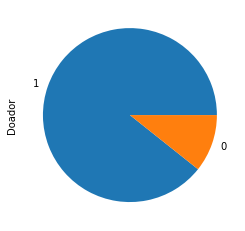

In [ ]:
df['Doador'].value_counts().plot.pie(subplots=True)

O número de doadores de sangue é bem maior que os não-doadores, então o desafio da rede neural será diferenciar essas dua classes.

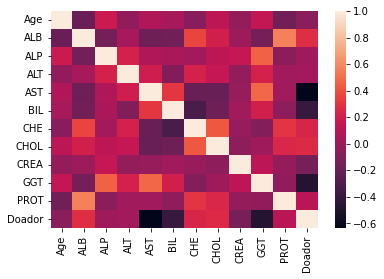

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

As variáveis com menor correlação com o fato de uma pessoa ser doadora ou não são a concentração da enzima AST, concentração de bilirrubina e nível de enzima GGT no sangue. Sendo assim, esses parecem ser os fatores mais determinantes para decidir se uma pessoa pode doar sangue ou não.

### **Rede Neural**

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste = train_test_split(df, train_size=0.8)

['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


Aqui dividimos o dataset em 80% para treino e 20% para teste.

In [ ]:
import tensorflow
from tensorflow import keras

nn = keras.Sequential([
      keras.layers.Input(len(x_treino.columns)-3),
      keras.layers.Dense(4, activation='relu'),
      keras.layers.Dense(3, activation='relu'),
      keras.layers.Dense(2, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
])
nn.compile(optimizer='adam' , loss='binary_crossentropy')
nn.fit(x_treino[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']],x_treino['Doador'])

15/15 [==============================] - 1s 4ms/step - loss: 0.9779


Criamos uma rede neural que recebe 4 entradas referentes as características físicas do asteroide, como diâmetro mínimo, máximo, velocidade relativa à terra e magnitude absoluta. Esses dados passam por uma rede de 3 camadas internas e 1 de saída. A 1ª camada interna possui 4 nós enquanto o número de nós das camadas posteriores vão reduzindo gradativamente.
Realizamos também o fit com as entradas e a rede está pronta para fazer previsões com o conjunto de treino.

In [ ]:
prevs = nn.predict(x_treino[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']])
prevs[:30]

array([[5.0370401e-01],
       [2.0015574e-01],
       [5.0370401e-01],
       [5.0370401e-01],
       [5.0370401e-01],
       [1.3159004e-01],
       [5.0370401e-01],
       [4.9727261e-03],
       [5.0370401e-01],
       [5.0370401e-01],
       [5.0370401e-01],
       [5.0370401e-01],
       [5.0370401e-01],
       [2.5925533e-06],
       [5.0370401e-01],
       [1.5576780e-03],
       [5.0370401e-01],
       [3.4340543e-01],
       [5.0370401e-01],
       [5.0370401e-01],
       [5.0370401e-01],
       [5.0370401e-01],
       [9.7539604e-02],
       [7.2177420e-10],
       [5.0370401e-01],
       [5.0370401e-01],
       [3.3883796e-12],
       [5.0370401e-01],
       [5.0370401e-01],
       [5.0370401e-01]], dtype=float32)

In [ ]:
limiar = 0.5
def atv(v):
  if v < limiar:
    return 0
  return 1

ptr = [atv(i) for i in prevs]
ptr[:10]

[1, 0, 1, 1, 1, 0, 1, 0, 1, 1]

Determinamos um limiar de ativação de 0.5 para transformar as saídas da rede neural em resultados booleanos (1 = Doador, 0 = Não-doador).



In [ ]:
y_treino = x_treino['Doador']
y_treino

22     1
408    1
355    1
421    1
402    1
      ..
254    1
475    1
258    1
596    0
325    1
Name: Doador, Length: 471, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
acuracia_treino= accuracy_score(y_treino,ptr)
acuracia_treino*100

86.83651804670913

86% de acurácia em treino. Vemos que a rede neural diferenciou muito bem pacientes que podem e não podem doar sangue e isso é muito positivo, ainda mais se tratando do nosso contexto de negócio em que erros podem custar vidas. Vamos ver como o modelo se comporta em teste

In [ ]:
previsoes = nn.predict(x_teste[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] )
pte = [atv(i) for i in previsoes]
pte[:15]

[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
y_teste = x_teste['Doador']
y_teste

482    1
352    1
305    1
15     1
450    1
      ..
143    1
125    1
105    1
175    1
401    1
Name: Doador, Length: 118, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
acuracia_teste= accuracy_score(y_teste,pte)
acuracia_teste*100

88.98305084745762

A acurácia de teste aumentou em 2% em relação ao treino. Esses resultados são muito bons para a rede como um todo, pois indicam que as regras associadas em treino serviram bastante para as variáveis do teste, ou seja, não houve um overfit. Como o nosso objetivo tem como cerne a saúde de uma pessoa, esses resultados indicam que o modelo poderia ser usado em um laboratório real, dada a sua alta eficiência. Mesmo assim, ainda nos resta avaliar os TP e FP, que são os fatores mais importantes aqui.

[[14  3]
 [10 91]]


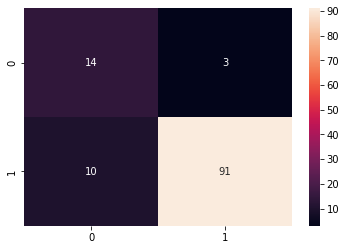

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm = confusion_matrix(y_teste , pte)
print(cm)
sns.heatmap(cm, annot=True)

Aqui podemos perceber que o modelo apontou uma ótima quantidade de acertos. Ele indicou com sucesso que 91 pessoas são de fato doadoras de sangue. A respeito dos erros, vemos que eles foram muito menores: Os falsos positivos são de longe a métrica mais crítica a ser avaliada, pois se o modelo classifica uma pessoa que não tem condições para doar sangue como doadora, muitas vidas podem estar em risco. Além disso, temos também a quantidade de falsos negativos, que apresenta um risco,porém menor. Se uma pessoa que pode doar sangue for classificada como não-doadora, ela deixará de doar e pessoas podem precisar disso. Mesmo assim, o modelo apresentou resultados muito satisfatórios no contexto do negócio

In [ ]:
print(classification_report(y_teste,pte))

              precision    recall  f1-score   support

           0       0.58      0.82      0.68        17
           1       0.97      0.90      0.93       101

    accuracy                           0.89       118
   macro avg       0.78      0.86      0.81       118
weighted avg       0.91      0.89      0.90       118



A rede neural teve um grande sucesso em avaliar positivos e um sucesso um pouco menor de avaliar os negativos. Porém, dentre os negativos tivemos um recall bem alto, de 82%.

###**Conclusão**

Após implementar o modelo e fazer as análises, vemos que essa rede neural preveu com sucesso aqueles que podem/não podem doar sangue. Uma clínica/laboratório poderia usá-la para agilizar os seus testes e tornar a sua gestão mais eficiente. Essa rede seria como um bom auxiliar no laboratório, mas julgamos arriscado ela susbstituir algum examinador. Mesmo assim, obtivemos boas métricas e a eficiência dessa rede foi muito boa e poderia fazer bastante diferença em um contexto real.